In [1]:
import os
import pandas as pd
from pandas import isnull

# Reading data
## Master.csv

In [2]:
master = pd.read_csv(os.path.join("data", "Master.csv"))
master.head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN
3,abbotre01,NaN,NaN,Reg,Abbott,NaN,Reginald Stewart,NaN,71.0,164.0,...,4.0,Canada,MB,Winnipeg,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,...,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
master.shape

(7761, 31)

In [4]:
master.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

In [5]:
# Braces let us structure the code in a readable way
(master['playerID']
    .pipe(isnull)
    .value_counts())
# .pipe is like Unix. Passes the previous to the next function as an argument

False    7520
True      241
Name: playerID, dtype: int64

In [6]:
# This is an alternative to the above:
isnull(master['playerID']).value_counts()
# 241 missing data rows

False    7520
True      241
Name: playerID, dtype: int64

In [7]:
# Removing null entries
master_orig = master.copy()
master.dropna(subset=['playerID'], inplace=True)
master.shape

(7520, 31)

In [8]:
master = master.dropna(subset=['firstNHL', 'lastNHL'], how='all')
# how=all ensures both entries need to be null

In [9]:
# filtering
master = master.loc[master['lastNHL']>=1980]
master.shape

(4627, 31)

In [10]:
# Removing unwanted columns the hard way
keeping = ['playerID', 'firstName', 'lastName',
          'pos', 'birthYear', 'birthMon', 'birthDay',
          'birthCountry', 'birthState', 'birthCity']
master[keeping].head()
master.filter(keeping).head() #another way to show

,playerID,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
0,aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
4,abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
9,abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
11,abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
14,actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [11]:
# Advanced and easy filtering with regex
master = master.filter(regex="(playerID|pos|^birth)|(Name$)")
master.columns

Index(['playerID', 'firstName', 'lastName', 'pos', 'birthYear', 'birthMon',
       'birthDay', 'birthCountry', 'birthState', 'birthCity'],
      dtype='object')

In [12]:
# Verify memory consumption
def mem_mib(df):
    print("{0:.2f} MiB".format(
        df.memory_usage().sum() / (1024*1024)
    ))
mem_mib(master)
mem_mib(master_orig)

0.39 MiB
1.84 MiB


In [13]:
#Analyze a columns value counts
master['pos'].value_counts()

D      1418
C      1037
L       848
R       832
G       463
F        28
L/C       1
Name: pos, dtype: int64

In [14]:
# Categories
pd.Categorical(master['pos'])

[C, L, L, D, C, ..., R, L, L, C, D]
Length: 4627
Categories (7, object): [C, D, F, G, L, L/C, R]

In [15]:
# Improve memory consumption
def make_categorical(df, col_name):
    df.loc[:, col_name] = pd.Categorical(df[col_name])
make_categorical(master, 'pos')
make_categorical(master, 'birthCountry')
make_categorical(master, 'birthState')
mem_mib(master)

0.30 MiB


In [16]:
# Since we`ve dropped many rows, the default index is now random. Solve by:
master = master.set_index('playerID')
master.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [17]:
# Save for later use:
master.to_pickle('master.pickle')

## Scoring.csv

In [18]:
scoring = pd.read_csv(os.path.join("data", "Scoring.csv"))
mem_mib(scoring)
scoring.shape
scoring.head()

10.87 MiB


,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def recent_nhl_only(df):
    return df[(df['lgID']=='NHL') & 
              (df['year'] >= 1980)]
scoring = recent_nhl_only(scoring)
scoring.shape

(28616, 31)

In [20]:
scoring.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'pos', 'GP', 'G', 'A',
       'Pts', 'PIM', '+/-', 'PPG', 'PPA', 'SHG', 'SHA', 'GWG', 'GTG', 'SOG',
       'PostGP', 'PostG', 'PostA', 'PostPts', 'PostPIM', 'Post+/-', 'PostPPG',
       'PostPPA', 'PostSHG', 'PostSHA', 'PostGWG', 'PostSOG'],
      dtype='object')

In [21]:
scoring = scoring.filter(regex="^(?!(Post|PP|SH)).*")
scoring.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'pos', 'GP', 'G', 'A',
       'Pts', 'PIM', '+/-', 'GWG', 'GTG', 'SOG'],
      dtype='object')

In [22]:
scoring.head()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,PIM,+/-,GWG,GTG,SOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,24.0,-12.0,0.0,0.0,61.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,26.0,-13.0,1.0,0.0,102.0
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,18.0
7,abdelju01,2007,1,DET,NHL,L,2.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,6.0


In [23]:
# Filter further by column index; Remember: iloc is for number based indexing and loc is of label based.
scoring = scoring.iloc[:, [0,1,3,6,7,8,9,14]]
scoring.columns

Index(['playerID', 'year', 'tmID', 'GP', 'G', 'A', 'Pts', 'SOG'], dtype='object')

In [24]:
make_categorical(scoring, 'tmID')
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
7,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [25]:
# reindex
scoring.reset_index(drop=True, inplace=True)
scoring.head()

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [26]:
scoring.to_pickle('scoring.pickle')

## Teams.csv

In [27]:
teams = pd.read_csv(os.path.join('data', 'Teams.csv'))
teams.shape

(1519, 27)

In [28]:
teams.columns

Index(['year', 'lgID', 'tmID', 'franchID', 'confID', 'divID', 'rank',
       'playoff', 'G', 'W', 'L', 'T', 'OTL', 'Pts', 'SoW', 'SoL', 'GF', 'GA',
       'name', 'PIM', 'BenchMinor', 'PPG', 'PPC', 'SHA', 'PKG', 'PKC', 'SHF'],
      dtype='object')

In [29]:
teams = recent_nhl_only(teams)
teams = teams[['year', 'tmID', 'name']]
teams.head()

,year,tmID,name
727,1980,BOS,Boston Bruins
728,1980,BUF,Buffalo Sabres
729,1980,CAL,Calgary Flames
730,1980,CHI,Chicago Black Hawks
731,1980,COR,Colorado Rockies


In [30]:
# CHeck number of unique values per column
teams.nunique()

year    31
tmID    37
name    37
dtype: int64

In [31]:
make_categorical(teams, 'tmID')
# We do not categorize name since it may hinder our capacity to play with strings

In [32]:
teams.to_pickle('teams.pickle')

# TeamSplits.csv

In [33]:
team_splits = pd.read_csv(os.path.join('data', 'TeamSplits.csv'))
team_splits.shape

(1519, 43)

In [34]:
team_splits = recent_nhl_only(team_splits)
team_splits.columns

Index(['year', 'lgID', 'tmID', 'hW', 'hL', 'hT', 'hOTL', 'rW', 'rL', 'rT',
       'rOTL', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL', 'OctT',
       'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [35]:
cols_to_drop = team_splits.columns[3:11]
team_splits = team_splits.drop(columns=cols_to_drop)
team_splits.columns

Index(['year', 'lgID', 'tmID', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL',
       'OctT', 'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL',
       'DecT', 'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL',
       'FebT', 'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL',
       'AprT', 'AprOL'],
      dtype='object')

In [36]:
team_splits = team_splits.drop(columns='lgID')

In [37]:
make_categorical(team_splits, 'tmID')
team_splits.to_pickle('team_splits.pickle')

# Joins

Sample use case using pd.merge
```python
pd.merge(df1, df2,
        on='playerID')
        
pd.merge(df1, df2,
        left_on='playerID',
        right_on='plID')        
```

In [38]:
# Importing
master = pd.read_pickle('master.pickle')
scoring = pd.read_pickle('scoring.pickle')
teams = pd.read_pickle('teams.pickle')
team_splits = pd.read_pickle('team_splits.pickle')

In [39]:
master.head(2)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon


In [40]:
scoring.head(2)

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0


In [41]:
# Merge on index and column
pd.merge(master, scoring, left_index=True, right_on='playerID').head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [42]:
scoring.index

RangeIndex(start=0, stop=28616, step=1)

In [43]:
# Which index does the merge keep? The one from the table we join on column!
scoring.index + 3

RangeIndex(start=3, stop=28619, step=1)

In [44]:
scoring.index = scoring.index + 3

In [45]:
# Observer the index started with the one we changed from the right table
pd.merge(master, scoring, left_index=True, right_on='playerID').head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
4,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
5,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
6,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
7,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [46]:
# Inner join by default
# Compare entries by join type
print(
    pd.merge(master, scoring, left_index=True, right_on='playerID').shape,
    pd.merge(master, scoring, left_index=True, right_on='playerID', how='right').shape
)

(28616, 17) (28616, 17)


In [47]:
# Drop some random row and check once again
master2 = master.drop(master.sample(5).index)
print(
    pd.merge(master2, scoring, left_index=True, right_on='playerID').shape,
    pd.merge(master2, scoring, left_index=True, right_on='playerID', how='right').shape
)

(28587, 17) (28616, 17)


In [48]:
merged = pd.merge(master2, scoring, left_index=True, right_on='playerID', how='right', indicator=True)
merged.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0,both
4,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0,both
5,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0,both
6,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0,both
7,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0,both


In [49]:
merged['_merge'].value_counts()

both          28587
right_only       29
left_only         0
Name: _merge, dtype: int64

In [50]:
merged[merged['_merge']=='right_only'].head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
3525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,carcida01,2006,PHO,18.0,4.0,3.0,7.0,32.0,right_only
3526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,carcida01,2007,PHO,57.0,13.0,11.0,24.0,106.0,right_only
3527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,carcida01,2008,PHO,54.0,3.0,7.0,10.0,95.0,right_only
3528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,carcida01,2008,PHI,20.0,0.0,4.0,4.0,35.0,right_only
3529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,carcida01,2009,PHI,76.0,12.0,10.0,22.0,105.0,right_only


In [51]:
scoring2 = scoring.drop(scoring.sample(1000).index)

In [52]:
merged = pd.merge(master2, scoring2, left_index=True, right_on='playerID', how='outer', indicator=True)

In [53]:
merged[(merged['_merge']=='left_only') |
       (merged['_merge']=='right_only')
      ].sample(3)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
6689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eliotda01,1984.0,LAK,33.0,0.0,0.0,0.0,0.0,right_only
6692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eliotda01,1987.0,DET,3.0,0.0,0.0,0.0,0.0,right_only
NaN,Pat,Mayer,D,1961.0,7.0,24.0,USA,MI,Royal Oak,mayerpa01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [54]:
# Alternative to the above:
merged[merged['_merge'].str.endswith('only')].sample(3)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
3530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,carcida01,2010.0,PHI,57.0,4.0,2.0,6.0,56.0,right_only
NaN,Stephane,Brochu,D,1967.0,8.0,15.0,Canada,QC,Sherbrooke,brochst01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sorocle01,1999.0,CAL,1.0,0.0,0.0,0.0,0.0,right_only


In [55]:
# Validate that the join was 1 to many:
pd.merge(master, scoring,
         left_index=True,
         right_on='playerID',
         validate='1:m').head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,playerID,year,tmID,GP,G,A,Pts,SOG
3,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
4,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
5,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
6,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
7,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [56]:
# Sample of exception
try:
    pd.merge(master, scoring,
             left_index=True,
             right_on='playerID',
             validate='1:1').head()
except Exception as e:
    print(e)

Merge keys are not unique in right dataset; not a one-to-one merge


In [57]:
merged = merged.filter(regex="^(?!(birth)).*") # drop birth data
merged.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
3.0,Antti,Aalto,C,aaltoan01,1997.0,ANA,3.0,0.0,0.0,0.0,1.0,both
4.0,Antti,Aalto,C,aaltoan01,1998.0,ANA,73.0,3.0,5.0,8.0,61.0,both
5.0,Antti,Aalto,C,aaltoan01,1999.0,ANA,63.0,7.0,11.0,18.0,102.0,both
6.0,Antti,Aalto,C,aaltoan01,2000.0,ANA,12.0,1.0,1.0,2.0,18.0,both
7.0,Justin,Abdelkader,L,abdelju01,2007.0,DET,2.0,0.0,0.0,0.0,6.0,both


In [58]:
merged.to_pickle('scoring_merged.pickle')

In [59]:
# Verify entries on the teams table
teams2 = teams[['tmID', 'name']]
teams2 = teams2.drop_duplicates()
teams2['tmID'].value_counts().head()

CHI    2
MIN    1
HAR    1
FLO    1
EDM    1
Name: tmID, dtype: int64

In [60]:
teams2.loc[teams2['tmID']=='CHI']

,tmID,name
730,CHI,Chicago Black Hawks
856,CHI,Chicago Blackhawks


In [64]:
# So we keep year for uniqueness
merged = pd.merge(team_splits, teams, 
         left_on=['tmID', 'year'],
         right_on=['tmID', 'year'],
         suffixes=['_team_splits', '_teams']).head(4)

In [65]:
merged.to_pickle(os.path.join('team_splits_merged.pickle'))

## Bonus Session
One can use join to merge multiple DataFrames that contain the common attribute on index:
```python
df1.join([df2, df3])
```

# 5. Long and Wide Data Formats
Measured Vs. Identifier variables Vs. Observations

## Practical Tips
* Use names (not values) for column names.
* A variable name as a value inside a column is generaly unadvised.

Moving between long and wide format in pandas:
```python
df.melt()
df.pivot()
```

In [67]:
import pandas as pd
import os

In [68]:
scoring = pd.read_pickle('scoring_merged.pickle')
team_splits = pd.read_pickle('team_splits_merged.pickle')

In [69]:
scoring.head(2)

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
3.0,Antti,Aalto,C,aaltoan01,1997.0,ANA,3.0,0.0,0.0,0.0,1.0,both
4.0,Antti,Aalto,C,aaltoan01,1998.0,ANA,73.0,3.0,5.0,8.0,61.0,both


## Playing with scores frame

In [72]:
three_years = scoring.loc[(scoring.year > 2000) &
                          (scoring.year < 2004)]

In [73]:
# One record per player
three_years = three_years.drop_duplicates(subset=['playerID', 'year'])

In [75]:
# Get 3 random players with complete history between 2001 and 2003
counts = three_years['playerID'].value_counts()

In [77]:
counts.sample(4)

johnscr01    3
stefapa01    3
faircke01    1
cotesy01     2
Name: playerID, dtype: int64

In [78]:
ids = counts[counts==3].sample(3).index

In [79]:
ids

Index(['cierniv01', 'rafalbr01', 'charazd01'], dtype='object')

In [80]:
# Get actual records corresponding for these players
df3 = three_years.loc[three_years['playerID'].isin(ids)]
basic_df3 = df3[['playerID', 'year', 'G']]

In [82]:
basic_df3

,playerID,year,G
3846.0,charazd01,2001.0,10.0
3847.0,charazd01,2002.0,9.0
3848.0,charazd01,2003.0,16.0
4190.0,cierniv01,2001.0,1.0
4192.0,cierniv01,2002.0,8.0
4193.0,cierniv01,2003.0,1.0
21039.0,rafalbr01,2001.0,7.0
21040.0,rafalbr01,2002.0,3.0
21041.0,rafalbr01,2003.0,6.0


In [83]:
# Spread year as columns
pivot = basic_df3.pivot(index='playerID', columns='year', values='G')
pivot

year,2001.0,2002.0,2003.0
playerID,,,
charazd01,10.0,9.0,16.0
cierniv01,1.0,8.0,1.0
rafalbr01,7.0,3.0,6.0


In [84]:
pivot.index.name

'playerID'

In [85]:
pivot.columns.name

'year'

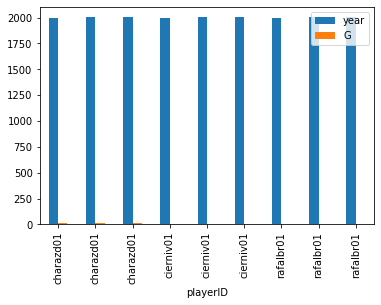

In [90]:
# Messy plot
basic_df3.set_index('playerID').plot.bar();

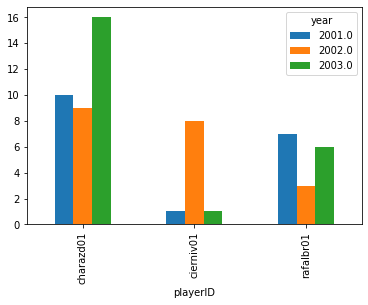

In [91]:
# Nice plot
pivot.plot.bar();

### Changing back to tall format

In [92]:
# melt doesn't like to work with indexes
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001.0,2002.0,2003.0
0,charazd01,10.0,9.0,16.0
1,cierniv01,1.0,8.0,1.0
2,rafalbr01,7.0,3.0,6.0


In [94]:
# id_vars = identity variables
pivot.melt(id_vars=['playerID'])

,playerID,variable,value
0,charazd01,2001,10.0
1,cierniv01,2001,1.0
2,rafalbr01,2001,7.0
3,charazd01,2002,9.0
4,cierniv01,2002,8.0
5,rafalbr01,2002,3.0
6,charazd01,2003,16.0
7,cierniv01,2003,1.0
8,rafalbr01,2003,6.0


In [96]:
pivot.melt(id_vars='playerID',
           var_name='year',
           value_name='goals')

,playerID,year,goals
0,charazd01,2001,10.0
1,cierniv01,2001,1.0
2,rafalbr01,2001,7.0
3,charazd01,2002,9.0
4,cierniv01,2002,8.0
5,rafalbr01,2002,3.0
6,charazd01,2003,16.0
7,cierniv01,2003,1.0
8,rafalbr01,2003,6.0


In [98]:
# Filtering before melting
pivot.melt(id_vars='playerID',
           value_vars=[2001,2002],
           var_name='year',
           value_name='goals')

,playerID,year,goals
0,charazd01,2001,10.0
1,cierniv01,2001,1.0
2,rafalbr01,2001,7.0
3,charazd01,2002,9.0
4,cierniv01,2002,8.0
5,rafalbr01,2002,3.0


# 6. Multi-level Indexes

The reason for multi-indexes to exist:
* optimize selection.
* creates multiple selection levels optimally.

## Creating multiindex:
```python
scoring.set_index(['playerID', 'year'])
```

## Grouping using MI
```python
scoring.groupby(level=1)['goals'].max()
scoring.groupby(level='year')['goals'].max()
```

## Flexible indexing and slicing
Slice arbitrary levels of the multiindex in a less verbose fashion
```python
idx = pd.IndexSlice
scoring.loc[idx['aaltoan01', 1997:2000], :]
scoring.loc[idx[:, 1997:2000], :]

# Remember to order your index first!
scoring.sort_index()
```

In [1]:
import pandas as pd
import os
master = pd.read_pickle('master.pickle')
scoring = pd.read_pickle('scoring_merged.pickle')
team_splits = pd.read_pickle('team_splits_merged.pickle')

In [2]:
scoring.head(2)

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG,_merge
3.0,Antti,Aalto,C,aaltoan01,1997.0,ANA,3.0,0.0,0.0,0.0,1.0,both
4.0,Antti,Aalto,C,aaltoan01,1998.0,ANA,73.0,3.0,5.0,8.0,61.0,both


In [3]:
mi = scoring.set_index(['playerID', 'year'])

In [4]:
mi.head()

firstName    lastName pos tmID    GP    G     A   Pts    SOG  \
playerID  year                                                                  
aaltoan01 1997.0     Antti       Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0   
          1998.0     Antti       Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0   
          1999.0     Antti       Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0   
          2000.0     Antti       Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0   
abdelju01 2007.0    Justin  Abdelkader   L  DET   2.0  0.0   0.0   0.0    6.0   

                 _merge  
playerID  year           
aaltoan01 1997.0   both  
          1998.0   both  
          1999.0   both  
          2000.0   both  
abdelju01 2007.0   both

In [5]:
mi.index

MultiIndex([('aaltoan01', 1997.0),
            ('aaltoan01', 1998.0),
            ('aaltoan01', 1999.0),
            ('aaltoan01', 2000.0),
            ('abdelju01', 2007.0),
            ('abdelju01', 2008.0),
            ('abdelju01', 2009.0),
            ('abdelju01', 2010.0),
            ('abdelju01', 2011.0),
            ( 'abidra01', 2002.0),
            ...
            ('mckeeja01', 2002.0),
            ('mckeeja01', 2003.0),
            ('mckeeja01', 2005.0),
            ('mckeeja01', 2006.0),
            ('mckeeja01', 2007.0),
            ('mckeeja01', 2008.0),
            ('mckeeja01', 2009.0),
            ('ryznaja01', 2005.0),
            ('sorocle01', 1998.0),
            ('sorocle01', 1999.0)],
           names=['playerID', 'year'], length=27646)

In [9]:
len(mi.index.levels)
# same as:
mi.index.nlevels

2

In [11]:
# grouping with multi-index is very convinient. e.g.: max number of goals per year
mi.groupby(level='year')['G'].max().head()

year
1980.0    68.0
1981.0    92.0
1982.0    71.0
1983.0    87.0
1984.0    73.0
Name: G, dtype: float64

In [12]:
# Showing the player name
mi.groupby(level='year')['G'].idxmax().head()

year
1980.0    (bossymi01, 1980.0)
1981.0    (gretzwa01, 1981.0)
1982.0    (gretzwa01, 1982.0)
1983.0    (gretzwa01, 1983.0)
1984.0    (gretzwa01, 1984.0)
Name: G, dtype: object

In [13]:
mi.loc[mi.groupby(level='year')['G'].idxmax()].head()

firstName lastName pos tmID    GP     G      A    Pts    SOG  \
playerID  year                                                                  
bossymi01 1980.0      Mike    Bossy   R  NYI  79.0  68.0   51.0  119.0  315.0   
gretzwa01 1981.0     Wayne  Gretzky   C  EDM  80.0  92.0  120.0  212.0  369.0   
          1982.0     Wayne  Gretzky   C  EDM  80.0  71.0  125.0  196.0  348.0   
          1983.0     Wayne  Gretzky   C  EDM  74.0  87.0  118.0  205.0  324.0   
          1984.0     Wayne  Gretzky   C  EDM  80.0  73.0  135.0  208.0  358.0   

                 _merge  
playerID  year           
bossymi01 1980.0   both  
gretzwa01 1981.0   both  
          1982.0   both  
          1983.0   both  
          1984.0   both

In [14]:
# simpler selection of records by name
mi.loc[('gretzwa01', 1982), :]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1404: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,,firstName,lastName,pos,tmID,GP,G,A,Pts,SOG,_merge
playerID,year,,,,,,,,,,
gretzwa01,1982.0,Wayne,Gretzky,C,EDM,80.0,71.0,125.0,196.0,348.0,both


In [15]:
# Prepare for slicing
idx = pd.IndexSlice
mi2 = mi.sort_index()

In [16]:
mi.index.is_lexsorted()

False

In [18]:
# The above check explains the performance warning. Indexes are ideally sorted for performance.
mi2.index.is_lexsorted()

True

In [20]:
sliced = mi2.loc[idx[:, 1997:2000], :]
sliced.head()

firstName lastName pos tmID    GP    G     A   Pts    SOG  \
playerID  year                                                               
aaltoan01 1997.0     Antti    Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0   
          1998.0     Antti    Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0   
          1999.0     Antti    Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0   
          2000.0     Antti    Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0   
adamsbr01 1999.0     Bryan    Adams   L  ATL   2.0  0.0   0.0   0.0    1.0   

                 _merge  
playerID  year           
aaltoan01 1997.0   both  
          1998.0   both  
          1999.0   both  
          2000.0   both  
adamsbr01 1999.0   both

In [21]:
# Adding names and steps to the year
sliced = mi2.loc[idx['aaltoan01':'adamscr01', 1997:2000:2], :]
sliced.head()

firstName lastName pos tmID    GP    G     A   Pts    SOG  \
playerID  year                                                               
aaltoan01 1997.0     Antti    Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0   
          1999.0     Antti    Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0   
adamsbr01 1999.0     Bryan    Adams   L  ATL   2.0  0.0   0.0   0.0    1.0   

                 _merge  
playerID  year           
aaltoan01 1997.0   both  
          1999.0   both  
adamsbr01 1999.0   both

In [26]:
# Advanced selection by getting indexes of the idx
locs = mi2.index.get_locs(
    idx['aaltoan01':'adamscr01', 19997:2000]
)
locs

array([], dtype=int64)

In [27]:
# Dunno why the above didn't work

## Manipulating previous long format with MI

In [28]:
team_splits.head(5)

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames
3,1980,CHI,NaN,NaN,NaN,NaN,6.0,4.0,2.0,NaN,...,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN,Chicago Black Hawks


In [29]:
# Columns contain Month concatenated with Metric name
# Step1: Move everything that is not a metric to the index
team_splits = team_splits.drop(columns=['tmID'])
team_splits = team_splits.set_index(['year', 'name'])
team_splits.head()

SepW  SepL  SepT  SepOL  OctW  OctL  OctT  OctOL  \
year name                                                                    
1980 Boston Bruins         NaN   NaN   NaN    NaN   2.0   7.0   1.0    NaN   
     Buffalo Sabres        NaN   NaN   NaN    NaN   5.0   2.0   2.0    NaN   
     Calgary Flames        NaN   NaN   NaN    NaN   5.0   4.0   2.0    NaN   
     Chicago Black Hawks   NaN   NaN   NaN    NaN   6.0   4.0   2.0    NaN   

                          NovW  NovL  ...  FebT  FebOL  MarW  MarL  MarT  \
year name                             ...                                  
1980 Boston Bruins         5.0   3.0  ...   2.0    NaN   8.0   4.0   3.0   
     Buffalo Sabres        8.0   4.0  ...   3.0    NaN   8.0   6.0   1.0   
     Calgary Flames        5.0   5.0  ...   1.0    NaN   6.0   6.0   2.0   
     Chicago Black Hawks   3.0   8.0  ...   4.0    NaN   4.0   5.0   4.0   

                          MarOL  AprW  AprL  AprT  AprOL  
year name                                                 
1980 Boston Bruins          NaN   1.0   2.0   0.0    NaN  
     Buffalo Sabres         NaN   1.0   1.0   1.0    NaN  
     Calgary Flames         NaN   2.0   0.0   0.0    NaN  
     Chicago Black Hawks    NaN   1.0   1.0   1.0    NaN  

[4 rows x 32 columns]

In [30]:
# Some advanced stuff ahead for parsing
months = team_splits.columns.map(lambda x: x[:3])
metrics = team_splits.columns.map(lambda x: x[3:])
print(months)
print(metrics)

Index(['Sep', 'Sep', 'Sep', 'Sep', 'Oct', 'Oct', 'Oct', 'Oct', 'Nov', 'Nov',
       'Nov', 'Nov', 'Dec', 'Dec', 'Dec', 'Dec', 'Jan', 'Jan', 'Jan', 'Jan',
       'Feb', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar', 'Apr', 'Apr',
       'Apr', 'Apr'],
      dtype='object')
Index(['W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L',
       'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T',
       'OL', 'W', 'L', 'T', 'OL'],
      dtype='object')


In [31]:
# Building a mi
midx = pd.MultiIndex.from_arrays([months, metrics])
midx

MultiIndex([('Sep',  'W'),
            ('Sep',  'L'),
            ('Sep',  'T'),
            ('Sep', 'OL'),
            ('Oct',  'W'),
            ('Oct',  'L'),
            ('Oct',  'T'),
            ('Oct', 'OL'),
            ('Nov',  'W'),
            ('Nov',  'L'),
            ('Nov',  'T'),
            ('Nov', 'OL'),
            ('Dec',  'W'),
            ('Dec',  'L'),
            ('Dec',  'T'),
            ('Dec', 'OL'),
            ('Jan',  'W'),
            ('Jan',  'L'),
            ('Jan',  'T'),
            ('Jan', 'OL'),
            ('Feb',  'W'),
            ('Feb',  'L'),
            ('Feb',  'T'),
            ('Feb', 'OL'),
            ('Mar',  'W'),
            ('Mar',  'L'),
            ('Mar',  'T'),
            ('Mar', 'OL'),
            ('Apr',  'W'),
            ('Apr',  'L'),
            ('Apr',  'T'),
            ('Apr', 'OL')],
           )

In [32]:
# Then replace the columns with the multi-index column just created
team_splits.columns = midx
team_splits.head()

Sep              Oct                Nov       ...  \
                           W   L   T  OL    W    L    T  OL    W    L  ...   
year name                                                              ...   
1980 Boston Bruins       NaN NaN NaN NaN  2.0  7.0  1.0 NaN  5.0  3.0  ...   
     Buffalo Sabres      NaN NaN NaN NaN  5.0  2.0  2.0 NaN  8.0  4.0  ...   
     Calgary Flames      NaN NaN NaN NaN  5.0  4.0  2.0 NaN  5.0  5.0  ...   
     Chicago Black Hawks NaN NaN NaN NaN  6.0  4.0  2.0 NaN  3.0  8.0  ...   

                          Feb      Mar                Apr                
                            T  OL    W    L    T  OL    W    L    T  OL  
year name                                                                
1980 Boston Bruins        2.0 NaN  8.0  4.0  3.0 NaN  1.0  2.0  0.0 NaN  
     Buffalo Sabres       3.0 NaN  8.0  6.0  1.0 NaN  1.0  1.0  1.0 NaN  
     Calgary Flames       1.0 NaN  6.0  6.0  2.0 NaN  2.0  0.0  0.0 NaN  
     Chicago Black Hawks  4.0 NaN  4.0  5.0  4.0 NaN  1.0  1.0  1.0 NaN  

[4 rows x 32 columns]

In [33]:
# Now we wish to melt the months into rows
team_splits = team_splits.stack(level=0)
team_splits.head(10)

L  OL    T    W
year name                                 
1980 Boston Bruins  Apr  2.0 NaN  0.0  1.0
                    Dec  6.0 NaN  1.0  6.0
                    Feb  4.0 NaN  2.0  6.0
                    Jan  4.0 NaN  1.0  9.0
                    Mar  4.0 NaN  3.0  8.0
                    Nov  3.0 NaN  5.0  5.0
                    Oct  7.0 NaN  1.0  2.0
     Buffalo Sabres Apr  1.0 NaN  1.0  1.0
                    Dec  3.0 NaN  4.0  5.0
                    Feb  3.0 NaN  3.0  6.0

In [34]:
# Didn't like the name at level 1
team_splits = team_splits.swaplevel(1,2)
team_splits.head()

L  OL    T    W
year     name                            
1980 Apr Boston Bruins  2.0 NaN  0.0  1.0
     Dec Boston Bruins  6.0 NaN  1.0  6.0
     Feb Boston Bruins  4.0 NaN  2.0  6.0
     Jan Boston Bruins  4.0 NaN  1.0  9.0
     Mar Boston Bruins  4.0 NaN  3.0  8.0

In [35]:
# Did not like it either
team_splits = team_splits.reorder_levels([2,0,1])
team_splits.head()

L  OL    T    W
name          year                       
Boston Bruins 1980 Apr  2.0 NaN  0.0  1.0
                   Dec  6.0 NaN  1.0  6.0
                   Feb  4.0 NaN  2.0  6.0
                   Jan  4.0 NaN  1.0  9.0
                   Mar  4.0 NaN  3.0  8.0

In [36]:
# Naming the month index
team_splits.index.levels[2].name = 'month'
team_splits.head()

L  OL    T    W
name          year month                   
Boston Bruins 1980 Apr    2.0 NaN  0.0  1.0
                   Dec    6.0 NaN  1.0  6.0
                   Feb    4.0 NaN  2.0  6.0
                   Jan    4.0 NaN  1.0  9.0
                   Mar    4.0 NaN  3.0  8.0

In [37]:
# Now let's compute sums for everybody
team_splits.groupby(level=['name', 'year']).sum().head(10)

,,L,OL,T,W
name,year,,,,
Boston Bruins,1980,30.0,0.0,13.0,37.0
Buffalo Sabres,1980,20.0,0.0,21.0,39.0
Calgary Flames,1980,27.0,0.0,14.0,39.0
Chicago Black Hawks,1980,33.0,0.0,16.0,31.0


In [38]:
# Going wide again
team_splits.unstack(level=['year', 'month']).head()

L                                 OL          ...    T  \
year                1980                               1980          ... 1980   
month                Apr  Dec  Feb  Jan  Mar  Nov  Oct  Apr Dec Feb  ...  Mar   
name                                                                 ...        
Boston Bruins        2.0  6.0  4.0  4.0  4.0  3.0  7.0  NaN NaN NaN  ...  3.0   
Buffalo Sabres       1.0  3.0  3.0  1.0  6.0  4.0  2.0  NaN NaN NaN  ...  1.0   
Calgary Flames       0.0  3.0  2.0  7.0  6.0  5.0  4.0  NaN NaN NaN  ...  2.0   
Chicago Black Hawks  1.0  9.0  3.0  3.0  5.0  8.0  4.0  NaN NaN NaN  ...  4.0   

                                 W                                
year                          1980                                
month                Nov  Oct  Apr  Dec  Feb  Jan  Mar  Nov  Oct  
name                                                              
Boston Bruins        5.0  1.0  1.0  6.0  6.0  9.0  8.0  5.0  2.0  
Buffalo Sabres       3.0  2.0  1.0  5.0  6.0  6.0  8.0  8.0  5.0  
Calgary Flames       3.0  2.0  2.0  6.0  9.0  6.0  6.0  5.0  5.0  
Chicago Black Hawks  3.0  2.0  1.0  3.0  5.0  9.0  4.0  3.0  6.0  

[4 rows x 28 columns]

In [39]:
team_splits.to_pickle('team_splits_mi.pickle')
mi2.to_pickle('scoring_mi.pickle')

# Time Series
It's a data type that arises in order to solve the problem of how to store very granular time data: `pd.Timestamp`, `pd.Timedelta` and `pd.Period`. These can generate specific index types.

In [40]:
import pandas as pd
import os

In [41]:
master = pd.read_pickle('master.pickle')
team_splits = pd.read_pickle('team_splits_mi.pickle')

In [42]:
master.head()

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon
abidra01,Ramzi,Abid,L,1980.0,3.0,24.0,Canada,QC,Montreal
abrahth01,Thommy,Abrahamsson,D,1947.0,4.0,12.0,Sweden,NaN,Leksand
actonke01,Keith,Acton,C,1958.0,4.0,15.0,Canada,ON,Stouffville


In [43]:
# Change 3 columns into time data types
# assign creates a new column based on a function
master = master.assign(birthDate = pd.to_datetime({
    'year': master.birthYear,
    'month': master.birthMon,
    'day': master.birthDay
}))
master = master.drop(columns=['birthYear', 'birthMon', 'birthDay'])
master.head()

,firstName,lastName,pos,birthCountry,birthState,birthCity,birthDate
playerID,,,,,,,
aaltoan01,Antti,Aalto,C,Finland,NaN,Lappeenranta,1975-03-04
abdelju01,Justin,Abdelkader,L,USA,MI,Muskegon,1987-02-25
abidra01,Ramzi,Abid,L,Canada,QC,Montreal,1980-03-24
abrahth01,Thommy,Abrahamsson,D,Sweden,NaN,Leksand,1947-04-12
actonke01,Keith,Acton,C,Canada,ON,Stouffville,1958-04-15


In [44]:
master.birthDate.head(2)

playerID
aaltoan01   1975-03-04
abdelju01   1987-02-25
Name: birthDate, dtype: datetime64[ns]

In [45]:
ts = master.birthDate[0]

In [46]:
ts

Timestamp('1975-03-04 00:00:00')

In [47]:
print('{}, {} {} {}'.format(ts.day_name(), ts.day, ts.month_name(), ts.year))

Tuesday, 4 March 1975


In [48]:
# Changing time zones
tsz = ts.tz_localize('America/Toronto') # make the timestamp aware of time zone
tsz

Timestamp('1975-03-04 00:00:00-0500', tz='America/Toronto')

In [50]:
tsz.tz_convert('Europe/London')

Timestamp('1975-03-04 05:00:00+0000', tz='Europe/London')

In [53]:
# Time selection based on year
years = master.birthDate.dt.year
years.head()

playerID
aaltoan01    1975
abdelju01    1987
abidra01     1980
abrahth01    1947
actonke01    1958
Name: birthDate, dtype: int64

In [60]:
# Converting strings and date formats
strings = master.birthDate.dt.strftime('%Y-%M-%D')
strings.head()

playerID
aaltoan01    1975-00-03/04/75
abdelju01    1987-00-02/25/87
abidra01     1980-00-03/24/80
abrahth01    1947-00-04/12/47
actonke01    1958-00-04/15/58
Name: birthDate, dtype: object

In [57]:
try:
    dates = pd.to_datetime(strings)
except Exception as e:
    print(e)
dates.head()

('Unknown string format:', '1975-04-1975-Tue')


NameError: name 'dates' is not defined

In [61]:
# Working with Indexed Time
birth_dates = pd.Series(master.index, index=master.birthDate)
birth_dates.head()

birthDate
1975-03-04    aaltoan01
1987-02-25    abdelju01
1980-03-24     abidra01
1947-04-12    abrahth01
1958-04-15    actonke01
Name: playerID, dtype: object

In [62]:
# Sorting and Filtering like magic
birth_dates = birth_dates.sort_index()
birth_dates.head(3)

birthDate
1940-01-27    harpete01
1940-03-22     keonda01
1940-10-03    ratelje01
Name: playerID, dtype: object

In [65]:
born_1980 = birth_dates['1980']
born_1980.head()

birthDate
1980-01-02    zalesmi01
1980-01-10    stanara01
1980-01-13    bouckty01
1980-01-13     ruppmi01
1980-01-15    papinju01
Name: playerID, dtype: object

In [67]:
birth_dates['1980-06'].head()

birthDate
1980-06-01    svoboja01
1980-06-01    weinhma01
1980-06-04    beaucfr01
1980-06-05    zanongr01
1980-06-05    fishemi01
Name: playerID, dtype: object

In [68]:
birth_dates['1980-07-20':'1980-07-31'].head()

birthDate
1980-07-20    arsende01
1980-07-22    kalindm01
1980-07-24    jillsje01
1980-07-24    printda01
1980-07-31    fischji01
Name: playerID, dtype: object